# **Actividad 3.5** – 🍷 Clasificación de vinos:

El objeto de esta actividad es poner en práctica los conocimientos adquiridos hasta el 
momento para ellos vamos a utilizar el siguiente dataset que contiene una serie de 
características físico-químicas que determina la calidad del vino en una escala de valores del 1 
al 10.

El enlace donde se encuentran los dataset es el siguiente:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Como proyecto de partida se puede utilizar el ejemplo:

**Título**: Ejemplo_3_3_Clasificación_con_Naive_Bayes_(Heart_Diseases)

**Url**: https://colab.research.google.com/drive/1J_QQh_tkRngskGWRubrmcHC2J5HGLvrH?usp=sharing


## Importación de los datasets (**utilizar el dataset RedWine**)

In [ ]:
# importación de librerías

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sklearn.externals
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.multiclass import unique_labels

import joblib

In [ ]:
# importación de los datos

# df_wines = pd.read_csv('winequality-red.csv', sep=';')

# Vinos tintos
df_wines = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Vinos blancos
# df_wines = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

df_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# valores unicos de la columna 'quality'
# se usa en la matriz de confusión 

qualities = df_wines.quality
uniques = sorted(pd.unique(qualities).tolist())
uniques

[3, 4, 5, 6, 7, 8]

In [ ]:
# estadísticas descriptivas

df_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# separamos datos de entrada y salida

x_wines = df_wines.drop('quality', axis=1)
y_wines = df_wines['quality']

# separamos train y test

x_train, x_test, y_train, y_test = train_test_split(x_wines, y_wines, test_size=0.3, random_state=1)

## Mostrar la matriz de correlación de variables

In [ ]:
# Mostramos la matriz de correlación

df_wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


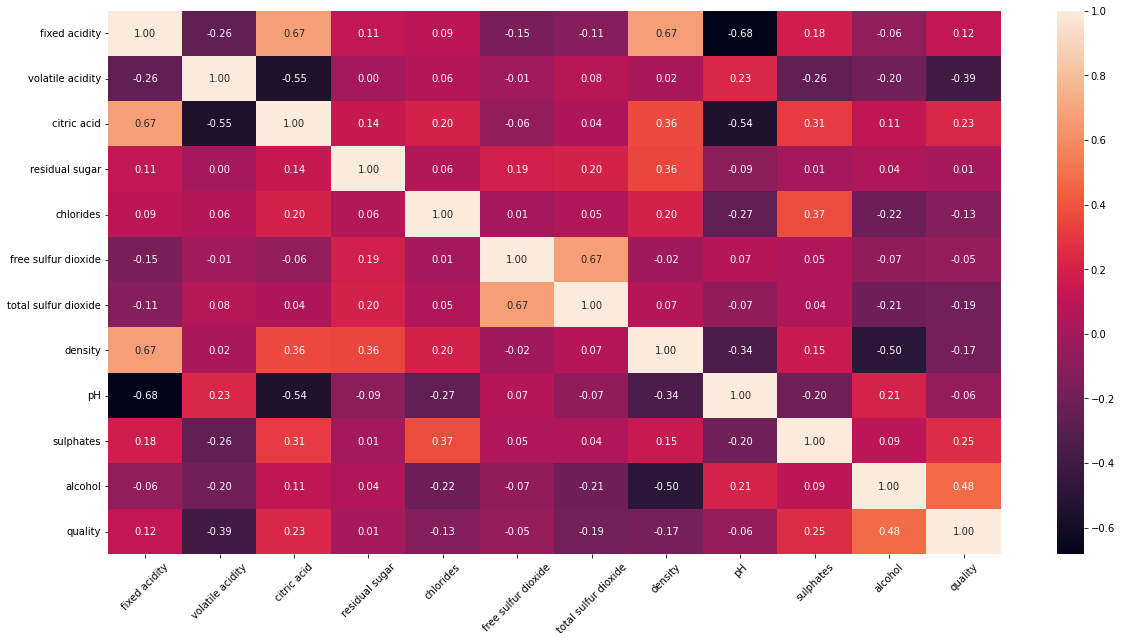

In [ ]:
# Mostramos la matriz de correlación
# como un mapa de calor 

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_wines.corr(), annot=True, fmt=".2f")
ax.set_xticklabels(
    labels=df_wines.columns.values,
    rotation=45,
    horizontalalignment='center'
);
plt.show()

## Mostrar comparativa por pares de variables (sns.pairplot)

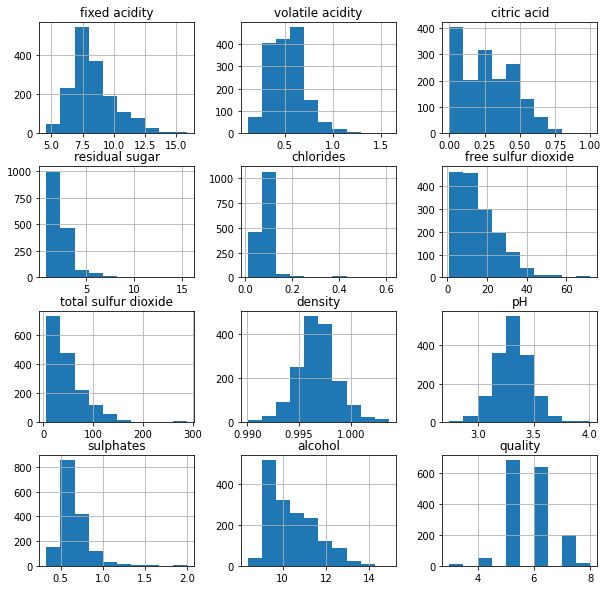

In [ ]:
# Mostramos los histogramas

df_wines.hist(figsize=(10,10))
plt.show()

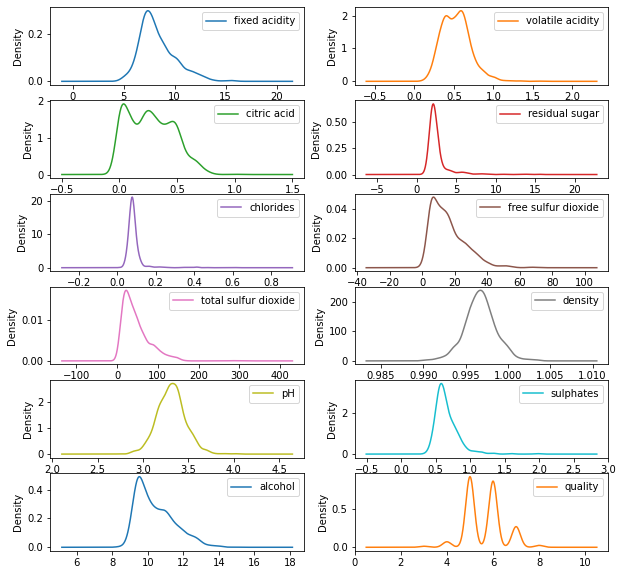

In [ ]:
# Mostramos las gráficas de densidad

df_wines.plot(kind='density', subplots=True, layout=(6,2), figsize=(10,10), sharex=False)
plt.show()

In [ ]:
# Mostramos el diagrama de pares (pairplot)

sns.pairplot(df_wines, hue='quality')

## Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos NaiveBayes

### Sin CrossValidation

In [ ]:
# DA FALLO SI AÑADO EL MODELO CategoricalNB()

# Modelos NaiveBayes
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

for name, clf in zip(names, classifiers):
  
  # Entrena el modelo
  clf.fit(x_train, y_train)

  # Predice y puntua
  # Devuelve la precisión media de las etiquetas y los datos de prueba proporcionados
  score = clf.score(x_test, y_test)
  print ("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.54
Modelo: MultiNomialNB =   0.44
Modelo: BernouilliNB =   0.42
Modelo: ComplementNB =   0.50


### Con CrossValidation

In [ ]:
cv = KFold(n_splits = 5, shuffle = True) 
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(x_train):

    # División train test aleatoria
    # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_x = x_train.iloc[train_fold]
    f_train_y = y_train.iloc[train_fold]

    # Entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)

    # Realizamos la predicción (Final evaluation) 
    # y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(x_train.iloc[test_fold])

    # Evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)

  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB =   0.53
Modelo: MultiNomialNB =   0.45
Modelo: BernouilliNB =   0.42
Modelo: ComplementNB =   0.48


## Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:

In [ ]:
# Elegimos el modelo: GaussianNB() sin CrossValidation
# El que obtiene más puntuación 

### Entrenarlo y obtener la matriz de confusión

In [ ]:
# Instanciamos el modelo

model = GaussianNB()

# Entrenamiento con los datos

model.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Predicción con nuevos datos

y_model = model.predict(x_test)
y_model

array([6, 5, 6, 6, 7, 6, 7, 5, 4, 5, 6, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 7,
       5, 7, 5, 6, 7, 6, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 5, 5, 7, 5, 5, 7, 5, 6, 6, 7, 6, 4, 5, 7, 5, 6, 5, 5, 6,
       7, 5, 7, 7, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5, 7,
       5, 6, 5, 7, 5, 7, 7, 5, 7, 5, 4, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 4,
       6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 7, 5, 7, 6, 6, 5,
       7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5, 7, 5, 5,
       7, 7, 7, 6, 7, 6, 7, 6, 5, 5, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5, 7, 5,
       5, 5, 5, 5, 6, 7, 5, 4, 7, 7, 6, 5, 3, 5, 5, 6, 5, 4, 6, 5, 6, 4,
       6, 5, 6, 6, 7, 5, 7, 6, 5, 5, 7, 6, 5, 6, 5, 7, 5, 5, 5, 5, 7, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 7, 7, 5, 5, 6, 6, 4, 4, 7, 5, 6, 6, 6, 6,
       6, 6, 6, 7, 6, 5, 5, 5, 5, 5, 8, 6, 6, 5, 5, 5, 5, 7, 7, 5, 6, 5,
       5, 6, 6, 5, 5, 7, 6, 5, 5, 7, 5, 6, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 6, 7, 5, 7, 5, 5, 6,

In [ ]:
# Evaluación y precisión del modelo

accuracy_score(y_test, y_model)

0.5416666666666666

[[  1   1   0   0   0   0]
 [  1   0  12   7   1   0]
 [  0   6 147  43  11   0]
 [  0   8  56  84  44   3]
 [  0   0   6  18  28   0]
 [  0   0   0   0   3   0]]


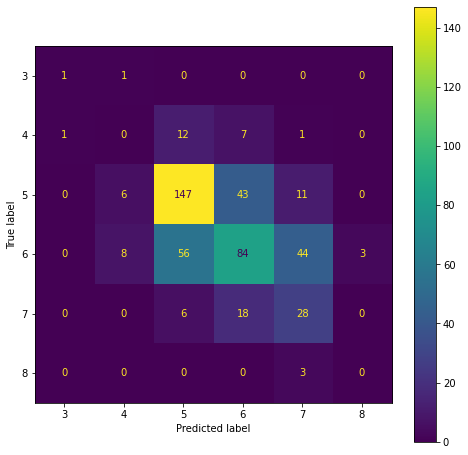

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_model)
print(cm)
display_cm = ConfusionMatrixDisplay(cm, display_labels=uniques)
fig, ax = plt.subplots(figsize=(8,8))
display_cm.plot(ax=ax)
plt.show()

### Exportar a un fichero los parámetros del modelo entrenado

In [ ]:
# Exportamos el modelo

joblib.dump(model,'vinos.pkl')

['vinos.pkl']

### Importar los parámetros del modelo

In [ ]:
# Importamos el modelo

import_model = GaussianNB()
import_model = joblib.load('vinos.pkl')
import_model.score(x_test, y_test)

0.5416666666666666

### Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión

[[  1   1   0   0   0   0]
 [  1   0  12   7   1   0]
 [  0   6 147  43  11   0]
 [  0   8  56  84  44   3]
 [  0   0   6  18  28   0]
 [  0   0   0   0   3   0]]


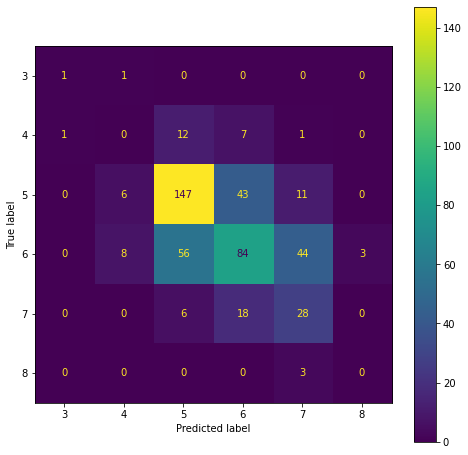

In [ ]:
# Realizamos la predicción

y_pred_import = import_model.predict(x_test)

# Matriz de Confusión

cm_import = confusion_matrix(y_test, y_pred_import)
print(cm_import)
display_cm_import = ConfusionMatrixDisplay(cm_import, display_labels=uniques)
fig, ax = plt.subplots(figsize=(8,8))
display_cm_import.plot(ax=ax)
plt.show()

## Comparar el resultado obtenido con el valor de calidad indicado en el dataset por medio de una matriz de confusión

[[  2   0   0   0   0   0]
 [  0  15   0   0   0   0]
 [  0   0 221   0   0   0]
 [  0   0   0 152   0   0]
 [  0   0   0   0  87   0]
 [  0   0   0   0   0   3]]


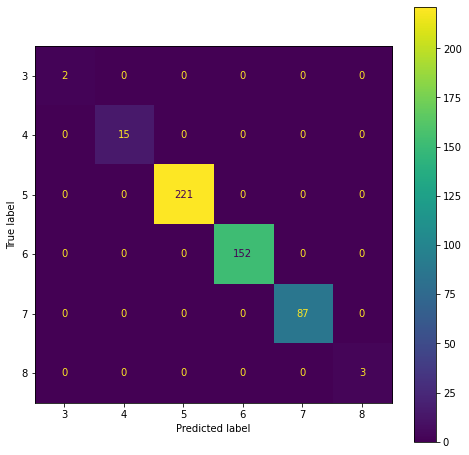

In [ ]:
# Matriz de Confusión

cm_import = confusion_matrix(y_model, y_pred_import)
print(cm_import)
display_cm_import = ConfusionMatrixDisplay(cm_import, display_labels=uniques)
fig, ax = plt.subplots(figsize=(8,8))
display_cm_import.plot(ax=ax)
plt.show()

### Obtener la precisión del resultado obtenido, para determinar si coincide con la precisión que se calculó durante el entrenamiento

In [ ]:
import_model.score(x_test, y_pred_import)

1.0

## Probar a utilizar el cuaderno con el dataset de los vinos blancos y concluir si hay variaciones en los métodos gausianos utilizados y en los resultados finales obtenidos